In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import matplotlib as mpl
import matplotlib.pyplot as plt

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.6.0


In [ ]:
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '../input/leafdataset/training'

train_val_data_gen = ImageDataGenerator(rotation_range=30,
                                        height_shift_range=50,
                                        width_shift_range=50,
                                        zoom_range=0.3,
                                        horizontal_flip=True,
                                        vertical_flip=True, 
                                        fill_mode='reflect',
                                        rescale=1/255.,
                                        validation_split=0.2)

train_gen = train_val_data_gen.flow_from_directory(directory=data_dir,
                                                   target_size=(256,256),
                                                   color_mode='rgb',
                                                   classes=None, # can be set to labels
                                                   class_mode='categorical',
                                                   batch_size=32,
                                                   shuffle=True,
                                                   seed=seed,
                                                   subset='training')
val_gen = train_val_data_gen.flow_from_directory(directory=data_dir,
                                                 target_size=(256,256),
                                                 color_mode='rgb',
                                                 classes=None, # can be set to labels
                                                 class_mode='categorical',
                                                 batch_size=32,
                                                 shuffle=True,
                                                 seed=seed,
                                                 subset='validation')

Found 14189 images belonging to 14 classes.
Found 3539 images belonging to 14 classes.


In [ ]:
input_shape = (256, 256, 3)
epochs = 60

In [ ]:
def build_model(input_shape):

    input_layer = tfkl.Input(shape=input_shape, name='Input')

    conv1 = tfkl.Conv2D(
        filters=16,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer=tfk.regularizers.l2(1e-5),
    )(input_layer)
    pool1 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv1)

    conv2 = tfkl.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer=tfk.regularizers.l2(1e-5),
    )(pool1)
    pool2 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv2)

    conv3 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer=tfk.regularizers.l2(1e-5),
    )(pool2)
    pool3 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv3)

    conv4 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer=tfk.regularizers.l2(1e-5),
    )(pool3)
    pool4 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv4)

    conv5 = tfkl.Conv2D(
        filters=256,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        kernel_regularizer=tfk.regularizers.l2(1e-5),
    )(pool4)
    pool5 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv5)

    flattening_layer = tfkl.Flatten(name='Flatten')(pool5)
    flattening_layer = tfkl.Dropout(0.3, seed=seed)(flattening_layer)

    classifier_layer1 = tfkl.Dense(units=512, name='Classifier1', kernel_initializer=tfk.initializers.GlorotUniform(seed), kernel_regularizer=tfk.regularizers.l2(1e-5), activation='relu')(flattening_layer)
    classifier_layer1 = tfkl.Dropout(0.3, seed=seed)(classifier_layer1)
    
    classifier_layer2 = tfkl.Dense(units=256, name='Classifier2', kernel_initializer=tfk.initializers.GlorotUniform(seed), kernel_regularizer=tfk.regularizers.l2(1e-5), activation='relu')(classifier_layer1)
    classifier_layer2 = tfkl.Dropout(0.3, seed=seed)(classifier_layer2)
    
    classifier_layer3 = tfkl.Dense(units=128, name='Classifier3', kernel_initializer=tfk.initializers.GlorotUniform(seed), kernel_regularizer=tfk.regularizers.l2(1e-5), activation='relu')(classifier_layer2)
    classifier_layer3 = tfkl.Dropout(0.3, seed=seed)(classifier_layer3)
    
    output_layer = tfkl.Dense(units=14, activation='softmax', kernel_initializer=tfk.initializers.GlorotUniform(seed), name='Output')(classifier_layer3)

    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='Model-6CL-3HL-l2norm')

    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    return model

2021-11-27 17:02:34.823188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-27 17:02:34.958397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-27 17:02:34.959399: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-27 17:02:34.961758: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "Model-6CL-3HL-l2norm"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64

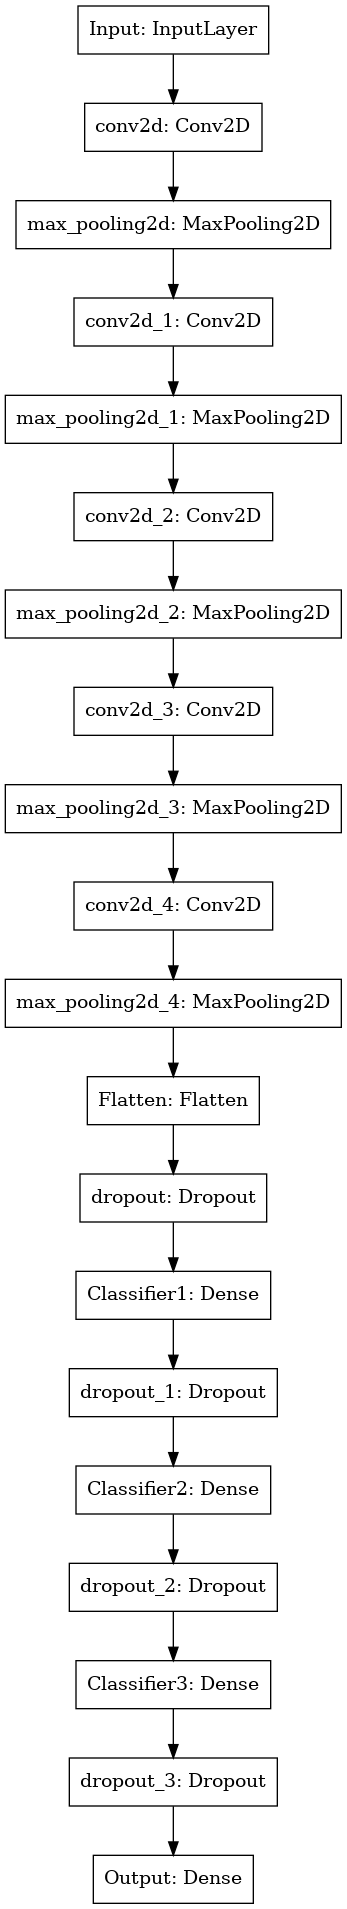

In [ ]:
model = build_model(input_shape)
model.summary()
tfk.utils.plot_model(model)

In [ ]:
patience = 10
early_stopping = tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=patience, restore_best_weights=True)

In [ ]:
history = model.fit(
    x = train_gen,
    epochs = epochs,
    validation_data = val_gen,
    callbacks = [early_stopping],
).history

2021-11-27 17:02:39.122307: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60


2021-11-27 17:02:41.647368: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


444/444 [==============================] - 342s 753ms/step - loss: 2.0072 - accuracy: 0.3911 - val_loss: 1.4574 - val_accuracy: 0.5276
Epoch 2/60
444/444 [==============================] - 253s 570ms/step - loss: 1.4851 - accuracy: 0.5399 - val_loss: 1.3626 - val_accuracy: 0.6030
Epoch 3/60
444/444 [==============================] - 260s 584ms/step - loss: 1.1973 - accuracy: 0.6375 - val_loss: 1.1065 - val_accuracy: 0.6507
Epoch 4/60
444/444 [==============================] - 252s 568ms/step - loss: 1.0172 - accuracy: 0.6893 - val_loss: 1.0194 - val_accuracy: 0.6889
Epoch 5/60
444/444 [==============================] - 254s 570ms/step - loss: 0.9293 - accuracy: 0.7178 - val_loss: 0.8634 - val_accuracy: 0.7480
Epoch 6/60
444/444 [==============================] - 254s 571ms/step - loss: 0.8486 - accuracy: 0.7482 - val_loss: 0.7863 - val_accuracy: 0.7528
Epoch 7/60
444/444 [==============================] - 254s 572ms/step - loss: 0.7616 - accuracy: 0.7799 - val_loss: 1.0543 - val_accura

In [ ]:
model.save('Model-6CL-3HL-l2norm')

2021-11-27 19:56:26.355334: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


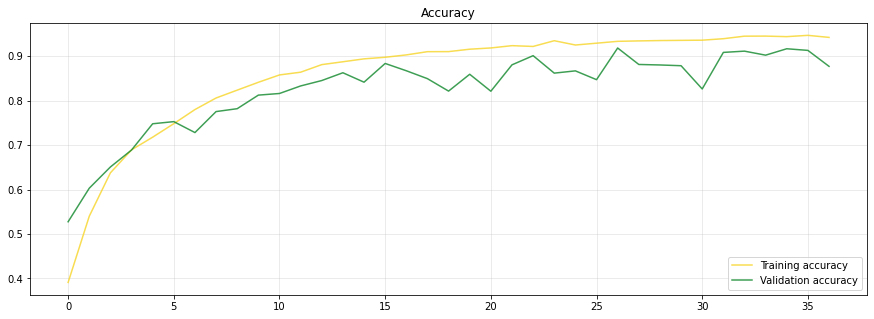

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#F7D426')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8, color='#0E8729')
plt.title('Accuracy')
plt.legend(loc='lower right')
plt.grid(alpha=.3)
plt.savefig('Model-6CL-3HL-l2norm-graph.png')
plt.show()